# POTATO
## Examples and introduction

This notebook contains an introduction to the POTATO package, we will work on the [Semeval](https://paperswithcode.com/sota/relation-extraction-on-semeval-2010-task-8) relation extraction dataset. To make sure you have all the files available, go to the [semeval](https://github.com/adaamko/POTATO/tree/main/features/semeval) folder and download the needed files. 

- POTATO is an IE tool that works on graphs, currently we support three types of graphs: AMR, UD and [Fourlang](https://github.com/kornai/4lang). 

- On this dataset(semeval) we experimented with fourlang semantic graphs. Make sure to follow the instructions in the [tuw_nlp](https://github.com/recski/tuw-nlp) repo to be able to build fourlang graphs. 

- If you are interested in AMR graphs, you can go to the [hasoc](https://github.com/adaamko/POTATO/tree/main/features/hasoc) folder To get started with rule-systems we provide rule-based features prebuilt with POTATO on the HASOC dataset (we also presented a paper named _Offensive text detection on English Twitter with deep learning models and rule-based systems_ for the HASOC2021 shared task). 

- We also provide experiments on the [CrowdTruth](https://github.com/CrowdTruth/Medical-Relation-Extraction) medical relation extraction datasets with UD graphs, go to the [crowdtruth](https://github.com/adaamko/POTATO/tree/main/features/crowdtruth) folder for more info!

In [1]:
# First we define the graph type
graph_format = "fourlang"

First we demonstrate POTATO's capabilities with a few sentences manually picked from the dataset.

__Note that we replaced the two entitites in question with _XXX_ and _YYY_.__

In [2]:
sentences = [("Governments and industries in nations around the world are pouring XXX into YYY.", "Entity-Destination(e1,e2)"),
            ("The scientists poured XXX into pint YYY.", "Entity-Destination(e1,e2)"),
            ("The suspect pushed the XXX into a deep YYY.", "Entity-Destination(e1,e2)"),
            ("The Nepalese government sets up a XXX to inquire into the alleged YYY of diplomatic passports.", "Other"),
            ("The entity1 to buy papers is pushed into the next entity2.", "Entity-Destination(e1,e2)"),
            ("An unnamed XXX was pushed into the YYY.", "Entity-Destination(e1,e2)"),
            ("Since then, numerous independent feature XXX have journeyed into YYY.", "Other"),
            ("For some reason, the XXX was blinded from his own YYY about the incommensurability of time.", "Other"),
            ("Sparky Anderson is making progress in his XXX from YYY and could return to managing the Detroit Tigers within a week.", "Other"),
            ("Olympics have already poured one XXX into the YYY.", "Entity-Destination(e1,e2)"),
            ("After wrapping him in a light blanket, they placed the XXX in the YYY his father had carved for him.", "Entity-Destination(e1,e2)"),
            ("I placed the XXX in a natural YYY, at the base of a part of the fallen arch.", "Entity-Destination(e1,e2)"),
            ("The XXX was delivered from the YYY of Lincoln Memorial on August 28, 1963 as part of his famous March on Washington.", "Other"),
            ("The XXX leaked from every conceivable YYY.", "Other"),
            ("The scientists placed the XXX in a tiny YYY which gets channelled into cancer cells, and is then unpacked with a laser impulse.", "Entity-Destination(e1,e2)"),
            ("The level surface closest to the MSS, known as the XXX, departs from an YYY by about 100 m in each direction.", "Other"),
            ("Gaza XXX recover from three YYY of war.", "Other"),
            ("This latest XXX from the animation YYY at Pixar is beautiful, masterly, inspired - and delivers a powerful ecological message.", "Other")]

First we need to initialize the dataset and also provide a label encoding. Then parse the sentences into graphs. Currently we provide three types of graphs: _ud_, _fourlang_, _amr_.

In [3]:
from xpotato.dataset.dataset import Dataset
from xpotato.models.trainer import GraphTrainer

In [4]:
dataset = Dataset(sentences, label_vocab={"Other":0, "Entity-Destination(e1,e2)": 1})
dataset.set_graphs(dataset.parse_graphs(graph_format=graph_format))

2022-02-14 12:39:47,351 : common (213) - WARNING - Can not find mwt: default from official model list. Ignoring it.
2022-02-14 12:39:47,353 : core (112) - INFO - Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |
| depparse  | combined |

2022-02-14 12:39:47,376 : core (123) - INFO - Use device: cpu
2022-02-14 12:39:47,377 : core (129) - INFO - Loading: tokenize
2022-02-14 12:39:47,382 : core (129) - INFO - Loading: pos
2022-02-14 12:39:47,537 : core (129) - INFO - Loading: lemma
2022-02-14 12:39:47,562 : core (129) - INFO - Loading: depparse
2022-02-14 12:39:47,852 : core (179) - INFO - Done loading processors!
2022-02-14 12:39:47,853 : pipeline (40) - INFO - loading NLP cache from en_nlp_cache...
2022-02-14 12:39:47,862 : pipeline (42) - INFO - done!
2022-02-14 12:39:47,863 : irtg (81) - INFO - loading cache from file: cache/UD_FL.json
2022-02-14 12:39:47,864 : i

In [5]:
# Check the dataset
df = dataset.to_dataframe()

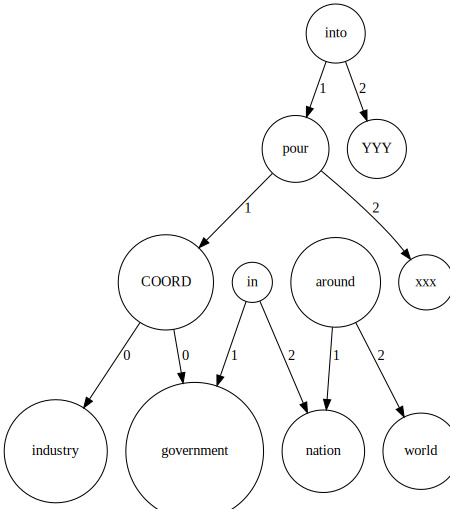

In [7]:
# We can also check any of the graphs
from xpotato.models.utils import to_dot
from graphviz import Source

Source(to_dot(df.iloc[0].graph))

## Simple examples

If the dataset is prepared and the graphs are parsed, we can write rules to match labels. We can write rules either manually or extract
them automatically (POTATO also provides a frontend that does both).

The simplest rule would be just a node in the graph:

In [8]:
# The syntax of the rules is List[List[rules that we want to match], List[rules that shouldn't be in the matched graphs], Label of the rule]
rule_to_match = [[["(u_1 / into)"], [], "Entity-Destination(e1,e2)"]]

Init the rule matcher:

In [9]:
from xpotato.graph_extractor.extract import FeatureEvaluator
evaluator = FeatureEvaluator()

Match the rules in the dataset:

In [10]:
# The function will return a dataframe with the matched instances:
evaluator.match_features(df, rule_to_match)

18it [00:00, 6470.47it/s]


,Sentence,Predicted label,Matched rule
0,Governments and industries in nations around t...,"Entity-Destination(e1,e2)","[[(u_1 / into)], [], Entity-Destination(e1,e2)]"
1,The scientists poured XXX into pint YYY.,"Entity-Destination(e1,e2)","[[(u_1 / into)], [], Entity-Destination(e1,e2)]"
2,The suspect pushed the XXX into a deep YYY.,"Entity-Destination(e1,e2)","[[(u_1 / into)], [], Entity-Destination(e1,e2)]"
3,The Nepalese government sets up a XXX to inqui...,"Entity-Destination(e1,e2)","[[(u_1 / into)], [], Entity-Destination(e1,e2)]"
4,The entity1 to buy papers is pushed into the n...,"Entity-Destination(e1,e2)","[[(u_1 / into)], [], Entity-Destination(e1,e2)]"
5,An unnamed XXX was pushed into the YYY.,"Entity-Destination(e1,e2)","[[(u_1 / into)], [], Entity-Destination(e1,e2)]"
6,"Since then, numerous independent feature XXX h...","Entity-Destination(e1,e2)","[[(u_1 / into)], [], Entity-Destination(e1,e2)]"
7,"For some reason, the XXX was blinded from his ...",,
8,Sparky Anderson is making progress in his XXX ...,,
9,Olympics have already poured one XXX into the ...,"Entity-Destination(e1,e2)","[[(u_1 / into)], [], Entity-Destination(e1,e2)]"


You can see in the dataset that the rules only matched the instances where the "into" node was present.

One of the core features of our tool is that we are also able to match subgraphs. To describe a graph, we use the [PENMAN](https://github.com/goodmami/penman) notation. 

E.g. the string _(u_1 / into :1 (u_3 / pour))_ would describe a graph with two nodes ("into" and "pour") and a single directed edge with the label "1" between them.

Describing a subgraph with the string "(u_1 / into :1 (u_2 / pour) :2 (u_3 / YYY))" will return only three examples instead of 9, when we only had a single node as a feature

In [11]:
#match a simple graph feature
evaluator.match_features(df, [[["(u_1 / into :1 (u_2 / pour) :2 (u_3 / YYY))"], [], "Entity-Destination(e1,e2)"]])

18it [00:00, 4578.38it/s]


,Sentence,Predicted label,Matched rule
0,Governments and industries in nations around t...,"Entity-Destination(e1,e2)",[[(u_1 / into :1 (u_2 / pour) :2 (u_3 / YYY))]...
1,The scientists poured XXX into pint YYY.,"Entity-Destination(e1,e2)",[[(u_1 / into :1 (u_2 / pour) :2 (u_3 / YYY))]...
2,The suspect pushed the XXX into a deep YYY.,,
3,The Nepalese government sets up a XXX to inqui...,,
4,The entity1 to buy papers is pushed into the n...,,
5,An unnamed XXX was pushed into the YYY.,,
6,"Since then, numerous independent feature XXX h...",,
7,"For some reason, the XXX was blinded from his ...",,
8,Sparky Anderson is making progress in his XXX ...,,
9,Olympics have already poured one XXX into the ...,"Entity-Destination(e1,e2)",[[(u_1 / into :1 (u_2 / pour) :2 (u_3 / YYY))]...


We can also add negated features that we don't want to match (this won't match the first row where 'pour' is present):

In [12]:
#match a simple graph feature with a negated feature. The negated features go into the second parameter.
evaluator.match_features(df, [[["(u_1 / into :2 (u_3 / YYY))"], ["(u_2 / pour)"], "Entity-Destination(e1,e2)"]])

18it [00:00, 4810.90it/s]


,Sentence,Predicted label,Matched rule
0,Governments and industries in nations around t...,,
1,The scientists poured XXX into pint YYY.,,
2,The suspect pushed the XXX into a deep YYY.,"Entity-Destination(e1,e2)","[[(u_1 / into :2 (u_3 / YYY))], [(u_2 / pour)]..."
3,The Nepalese government sets up a XXX to inqui...,"Entity-Destination(e1,e2)","[[(u_1 / into :2 (u_3 / YYY))], [(u_2 / pour)]..."
4,The entity1 to buy papers is pushed into the n...,,
5,An unnamed XXX was pushed into the YYY.,"Entity-Destination(e1,e2)","[[(u_1 / into :2 (u_3 / YYY))], [(u_2 / pour)]..."
6,"Since then, numerous independent feature XXX h...","Entity-Destination(e1,e2)","[[(u_1 / into :2 (u_3 / YYY))], [(u_2 / pour)]..."
7,"For some reason, the XXX was blinded from his ...",,
8,Sparky Anderson is making progress in his XXX ...,,
9,Olympics have already poured one XXX into the ...,,


If we don't want to specify nodes, regex can also be used in place of the node and edge-names:

In [13]:
#regex can be used to match any node (this will match instances where 'into' is connected to any node with '1' edge)
evaluator.match_features(df, [[["(u_1 / into :1 (u_2 / .*) :2 (u_3 / YYY))"], [], "Entity-Destination(e1,e2)"]])

18it [00:00, 6602.31it/s]


,Sentence,Predicted label,Matched rule
0,Governments and industries in nations around t...,"Entity-Destination(e1,e2)","[[(u_1 / into :1 (u_2 / .*) :2 (u_3 / YYY))], ..."
1,The scientists poured XXX into pint YYY.,"Entity-Destination(e1,e2)","[[(u_1 / into :1 (u_2 / .*) :2 (u_3 / YYY))], ..."
2,The suspect pushed the XXX into a deep YYY.,"Entity-Destination(e1,e2)","[[(u_1 / into :1 (u_2 / .*) :2 (u_3 / YYY))], ..."
3,The Nepalese government sets up a XXX to inqui...,"Entity-Destination(e1,e2)","[[(u_1 / into :1 (u_2 / .*) :2 (u_3 / YYY))], ..."
4,The entity1 to buy papers is pushed into the n...,,
5,An unnamed XXX was pushed into the YYY.,"Entity-Destination(e1,e2)","[[(u_1 / into :1 (u_2 / .*) :2 (u_3 / YYY))], ..."
6,"Since then, numerous independent feature XXX h...","Entity-Destination(e1,e2)","[[(u_1 / into :1 (u_2 / .*) :2 (u_3 / YYY))], ..."
7,"For some reason, the XXX was blinded from his ...",,
8,Sparky Anderson is making progress in his XXX ...,,
9,Olympics have already poured one XXX into the ...,"Entity-Destination(e1,e2)","[[(u_1 / into :1 (u_2 / .*) :2 (u_3 / YYY))], ..."


We can also train regex rules from a training data, this will automatically replace regex '.*' with nodes that are 
'good enough' statistically based on the provided dataframe.

In [14]:
evaluator.train_feature("Entity-Destination(e1,e2)", "(u_1 / into :1 (u_2 / .*) :2 (u_3 / YYY))", df)

['(u_1 / into :1 (u_2 / pour|push) :2 (u_3 / YYY))']

This returns '(u_1 / into :1 (u_2 / push|pour) :2 (u_3 / YYY))' (replaced '.*' with _push_ and _pour_)

## Learning rules
To extract rules automatically, train the dataset with graph features and rank them based on relevancy:

In [15]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, test_size=0.2, random_state=1234)

In [16]:
trainer = GraphTrainer(train)

Initializing trainer object...


In [17]:
features = trainer.prepare_and_train(min_edge=1)

Featurizing graphs by generating subgraphs up to 2...


14it [00:00, 279.91it/s]

Getting feature graphs...
Selecting the best features...
Generating training data...
Training...
Getting features...


In [18]:
features

defaultdict(list,
            {'Entity-Destination(e1,e2)': [(['(u_15 / into  :1 (u_19 / pour  :2 (u_1 / xxx)))'],
               [],
               'Entity-Destination(e1,e2)'),
              (['(u_15 / into  :1 (u_19 / pour))'],
               [],
               'Entity-Destination(e1,e2)'),
              (['(u_19 / pour  :2 (u_1 / xxx))'],
               [],
               'Entity-Destination(e1,e2)')]})

In [19]:
eval, acc = trainer.evaluator.evaluate_feature("Entity-Destination(e1,e2)", features["Entity-Destination(e1,e2)"], train)

In [20]:
eval

,Feature,Precision,Recall,Fscore,Support,False_positive_graphs,False_positive_sens,False_positive_indices,True_positive_graphs,True_positive_sens,True_positive_indices,False_negative_graphs,False_negative_sens,False_negative_indices,Predicted
0,[(u_15 / into :1 (u_19 / pour :2 (u_1 / xxx)))],1.0,0.428571,0.6,7,[],[],[],"[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10), (0, 1, 11...",[(Governments and industries in nations around...,"[2, 6, 7]","[(2, 86, 35, 87, 88, 89, 61, 1, 11, 5, 12, 90,...",[(The scientists placed the XXX in a tiny YYY ...,"[1, 3, 9, 11]","[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]"
1,[(u_15 / into :1 (u_19 / pour))],1.0,0.428571,0.6,7,[],[],[],"[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10), (0, 1, 11...",[(Governments and industries in nations around...,"[2, 6, 7]","[(2, 86, 35, 87, 88, 89, 61, 1, 11, 5, 12, 90,...",[(The scientists placed the XXX in a tiny YYY ...,"[1, 3, 9, 11]","[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]"
2,[(u_19 / pour :2 (u_1 / xxx))],1.0,0.428571,0.6,7,[],[],[],"[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10), (0, 1, 11...",[(Governments and industries in nations around...,"[2, 6, 7]","[(2, 86, 35, 87, 88, 89, 61, 1, 11, 5, 12, 90,...",[(The scientists placed the XXX in a tiny YYY ...,"[1, 3, 9, 11]","[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]"


In [21]:
import json

with open("features.json", "w+") as f:
    json.dump(features, f)

## Learning from the whole dataset

In [22]:
# Train a model using the training data from the semeval task.
# First we convert the data into the same format we used before
# Then we replace the two entities in question with "entity1" and "entity2" (We used XXX and YYY before)
import itertools
from tqdm import tqdm
import re

semeval_path = "../features/semeval/semeval_train.txt"
sentences = []
label_dict = {}
label_id = 0

with open(semeval_path, "r+") as f:
    for sample, label, _, _ in tqdm(itertools.zip_longest(*[f]*4)):
        sen_id, sentence = sample.split("\t")
        sentence_with_entities = re.sub(r"<e1>.*</e1>", r"entity1", sentence)
        sentence_with_entities = re.sub(r"<e2>.*</e2>", r"entity2", sentence_with_entities)
        sentence_with_entities = re.sub('"', r"", sentence_with_entities)
        
        label = label.strip()
        sentence_with_entities = sentence_with_entities.strip()

        if label not in label_dict:
            label_dict[label] = label_id
            label_id += 1
        sentences.append((sentence_with_entities, label))

8000it [00:00, 175511.33it/s]


In [23]:
from xpotato.dataset.dataset import Dataset
from xpotato.models.trainer import GraphTrainer

# The label dict was extracted automatically
dataset = Dataset(sentences, label_vocab=label_dict)

In [24]:
dataset.to_dataframe()

,text,label,label_id,graph
0,The system as described above has its greatest...,"Component-Whole(e2,e1)",0,None
1,The entity1 was carefully wrapped and bound in...,Other,1,None
2,The entity1 of a keygen uses a entity2 to look...,"Instrument-Agency(e2,e1)",2,None
3,A misty entity1 uprises from the entity2.,Other,1,None
4,The entity1 entity2 is the voice of the underg...,"Member-Collection(e1,e2)",3,None
...,...,...,...,...
7995,"When the entity1 is sent by entity2, the notic...",Other,1,None
7996,"The entity1 is derived from a natural entity2,...","Entity-Origin(e1,e2)",10,None
7997,"To test this, we placed a kitchen entity1 in t...","Entity-Destination(e1,e2)",5,None
7998,The farmers and city officials in the region h...,Other,1,None


We now have the dataset without graphs. We provide the graphs prebuilt, so if you run the download script in the _features/semeval/_ folder, you should have the graphs downloaded.

In [ ]:
dataset.load_graphs("../features/semeval/semeval_train_4lang_graphs.pickle", binary=True)

In [26]:
df = dataset.to_dataframe()

In [27]:
# The _Entity-Destination(e2,e1)_ label only have 1 instance, so we can remove it
df_entity_des = df[df.label == "Entity-Destination(e2,e1)"]
df = df.drop(df_entity_des.index, axis=0)

In [28]:
from sklearn.model_selection import train_test_split as split

tr_df, val_df = split(df, test_size=0.2, random_state=1234)

In [29]:
# Train the GraphTrainer
trainer = GraphTrainer(tr_df)
# We specify the min_edge parameter, so we don't include node features that are not connected to any edge.
features = trainer.prepare_and_train(min_edge=1)

Initializing trainer object...
Featurizing graphs by generating subgraphs up to 2...


6399it [00:24, 261.28it/s]


Getting feature graphs...
Selecting the best features...
Generating training data...
Training...


/home/adaamko/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Getting features...


In [30]:
# Let's see the top features for the Entity-Destination(e1,e2) label
features["Entity-Destination(e1,e2)"][:5]

[(['(u_3 / to  :2 (u_2 / entity2))'], [], 'Entity-Destination(e1,e2)'),
 (['(u_8 / into  :2 (u_2 / entity2))'], [], 'Entity-Destination(e1,e2)'),
 (['(u_264 / place  :2 (u_25 / entity1))'], [], 'Entity-Destination(e1,e2)'),
 (['(u_19 / in  :2 (u_2 / entity2))'], [], 'Entity-Destination(e1,e2)'),
 (['(u_1196 / give  :2 (u_25 / entity1))'], [], 'Entity-Destination(e1,e2)')]

In [31]:
# Let's evaluate the Top 5 features.
eval, acc = trainer.evaluator.evaluate_feature("Entity-Destination(e1,e2)", features["Entity-Destination(e1,e2)"][:5], tr_df)

In [32]:
eval[["Feature", "Precision", "Recall", "Fscore"]]

,Feature,Precision,Recall,Fscore
0,[(u_3 / to :2 (u_2 / entity2))],0.590909,0.200617,0.299539
1,[(u_8 / into :2 (u_2 / entity2))],0.762172,0.628086,0.688663
2,[(u_264 / place :2 (u_25 / entity1))],0.791667,0.058642,0.109195
3,[(u_19 / in :2 (u_2 / entity2))],0.117526,0.087963,0.100618
4,[(u_1196 / give :2 (u_25 / entity1))],0.533333,0.012346,0.024133


The _[(u_15 / into :2 (u_2 / entity2))]_ feature is a pretty great feature with 76% precision and 62% recall.

We want our features to be high precision, we can "train" this feature to remove the regex with specific nodes:

In [33]:
trained_feat = evaluator.train_feature("Entity-Destination(e1,e2)", "(u_1 / into :1 (u_2 / .*) :2 (u_3 / entity2))", tr_df)

In [34]:
trained_feat

['(u_1 / into :1 (u_2 / introduce|migrate|arrive|pour|misplace|import|transport|remove|dump|invest|stuff|flow|fly|add|leak|fetch|release|pack|insert|landing|spread|implant) :2 (u_3 / entity2))']

In [35]:
eval, acc = trainer.evaluator.evaluate_feature("Entity-Destination(e1,e2)", [(trained_feat, [], "Entity-Destination(e1,e2)")], tr_df)

In [36]:
eval[["Feature", "Precision", "Recall", "Fscore"]]

,Feature,Precision,Recall,Fscore
0,[(u_1 / into :1 (u_2 / introduce|migrate|arriv...,0.988701,0.270062,0.424242


__We can see that this simple feature achieved 98% precision with 26% recall, and it was extracted automatically__

In [37]:
from xpotato.dataset.utils import save_dataframe

In [38]:
save_dataframe(tr_df, 'semeval_train.tsv')
save_dataframe(val_df, 'semeval_val.tsv')